#### Import of Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [4]:
df = pd.read_excel('energyEfficiency.xlsx')
df=df.drop(columns=["Y2"])

In [5]:
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [6]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB
Number of duplicated rows is:  0
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

LinAlgError: singular matrix

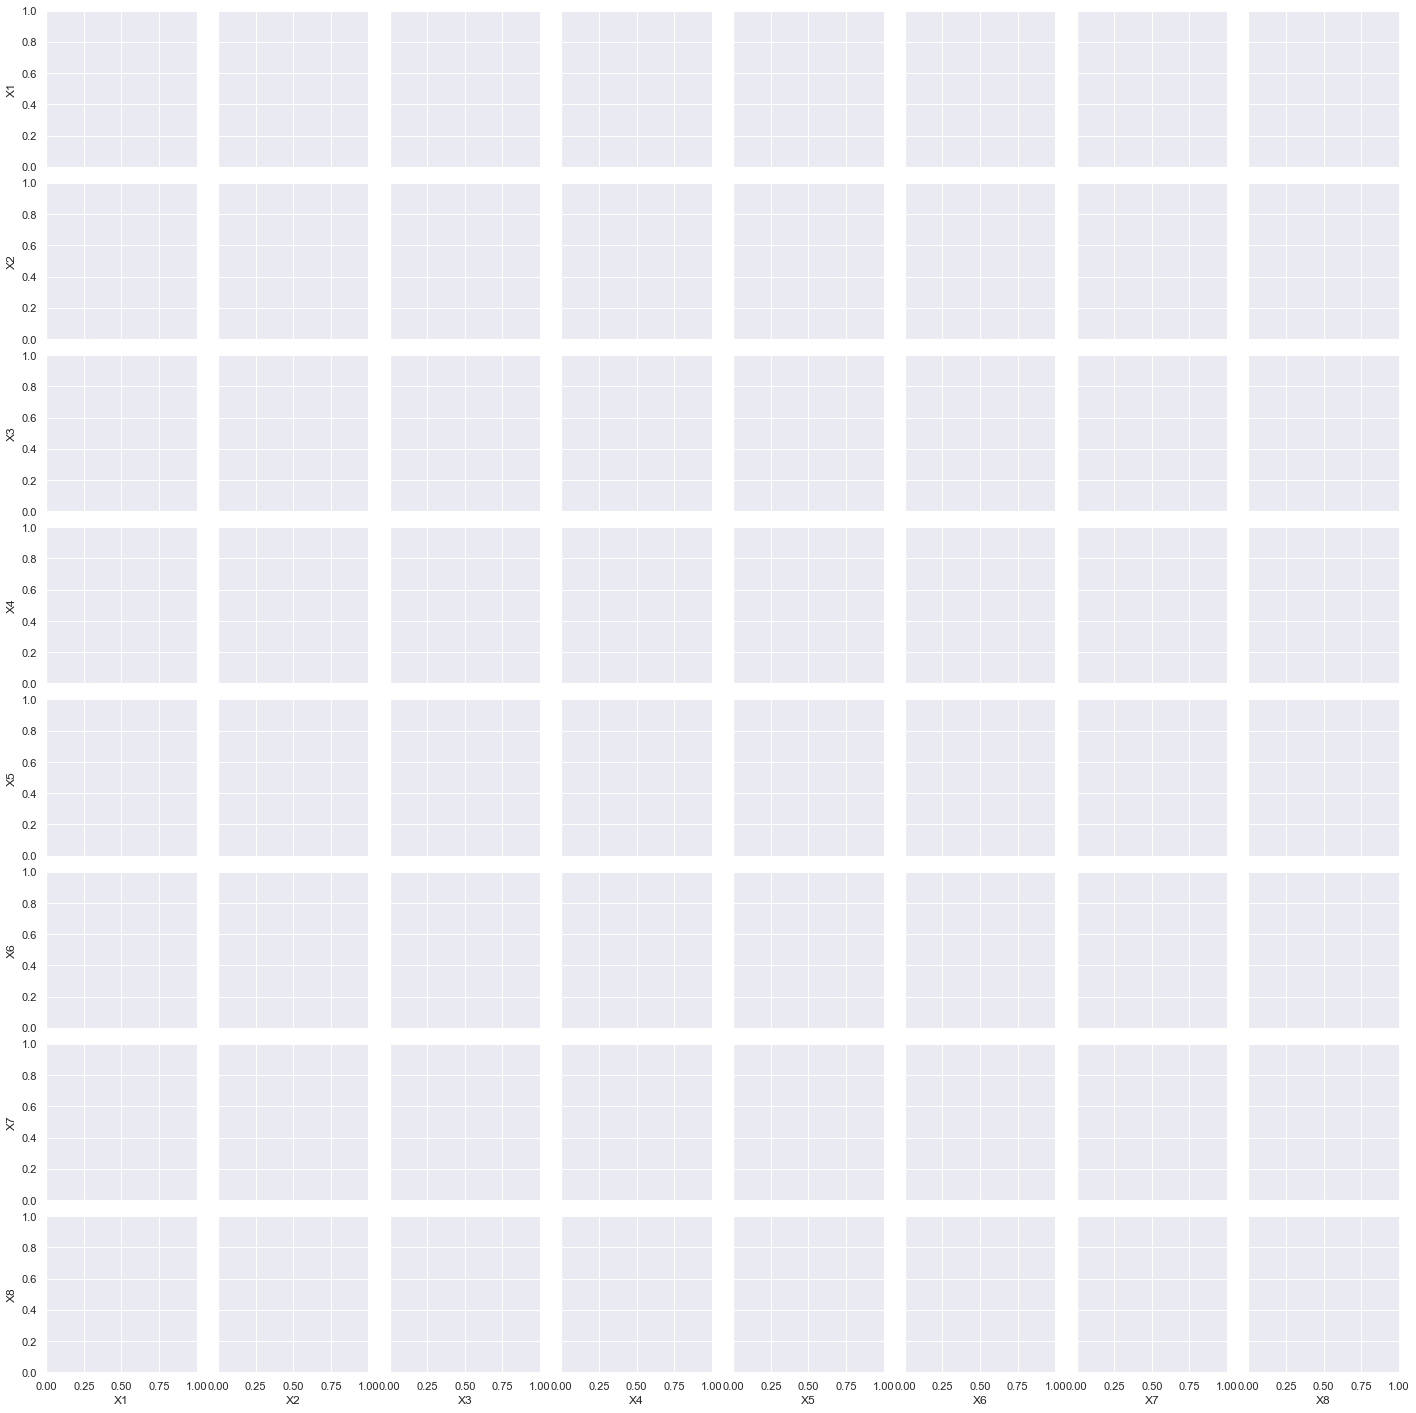

In [7]:
sns.pairplot(df, hue='Y1')
plt.show()

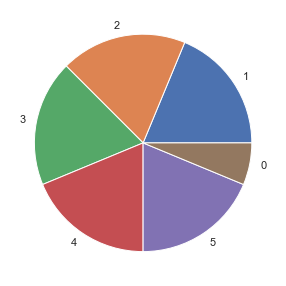

In [ ]:
y =df['Y1']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [ ]:
X = df.drop(columns=['Y1'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Y1,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


#### Standardize the Data

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X1,768.0,-7.401487e-17,1.000652,-1.363812,-0.772564,-0.134016,0.622781,2.041777
X2,768.0,-4.163336e-16,1.000652,-1.785875,-0.742182,0.023193,0.788568,1.553943
X3,768.0,0.000000e+00,1.000652,-1.685854,-0.561951,0.000000,0.561951,2.247806
X4,768.0,2.174187e-16,1.000652,-1.470077,-0.791580,0.158316,0.972512,0.972512
X5,768.0,0.000000e+00,1.000652,-1.000000,-1.000000,0.000000,1.000000,1.000000
X7,768.0,1.480297e-16,1.000652,-1.760447,-1.009323,0.117363,1.244049,1.244049
Y1,768.0,7.401487e-17,1.000652,-1.616203,-0.923744,-0.332935,0.928267,2.062035
Y2,768.0,-2.035409e-16,1.000652,-1.439739,-0.943269,-0.263777,0.898774,2.465759


#### Observations and Variables

In [ ]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

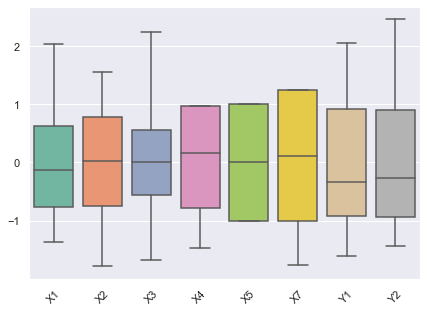

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

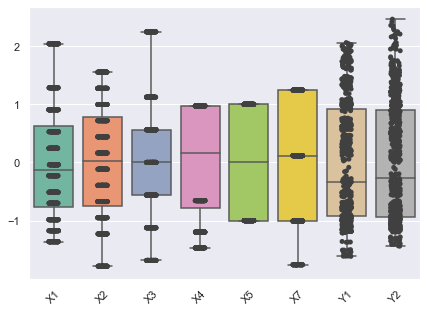

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

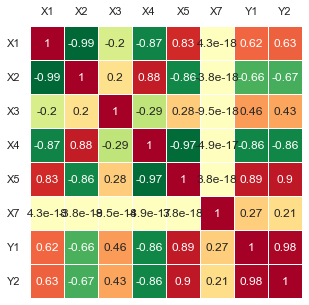

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [ ]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [ ]:
out['PC']

,PC1,PC2,PC3
0,1.978374,-2.548641,1.678218
1,1.978374,-2.548641,1.678218
2,1.978374,-2.548641,1.678218
3,1.978374,-2.548641,1.678218
4,1.925084,-1.322076,1.783181
...,...,...,...
763,-1.981518,1.435299,-1.047400
764,-2.346525,1.870924,-0.814107
765,-2.340752,1.874022,-0.814377
766,-2.360373,1.862560,-0.812035


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'3 Principal Components explain [99.28%] of the variance'}, xlabel='PC1 (65.2% expl.var)', ylabel='PC2 (18.9% expl.var)'>)

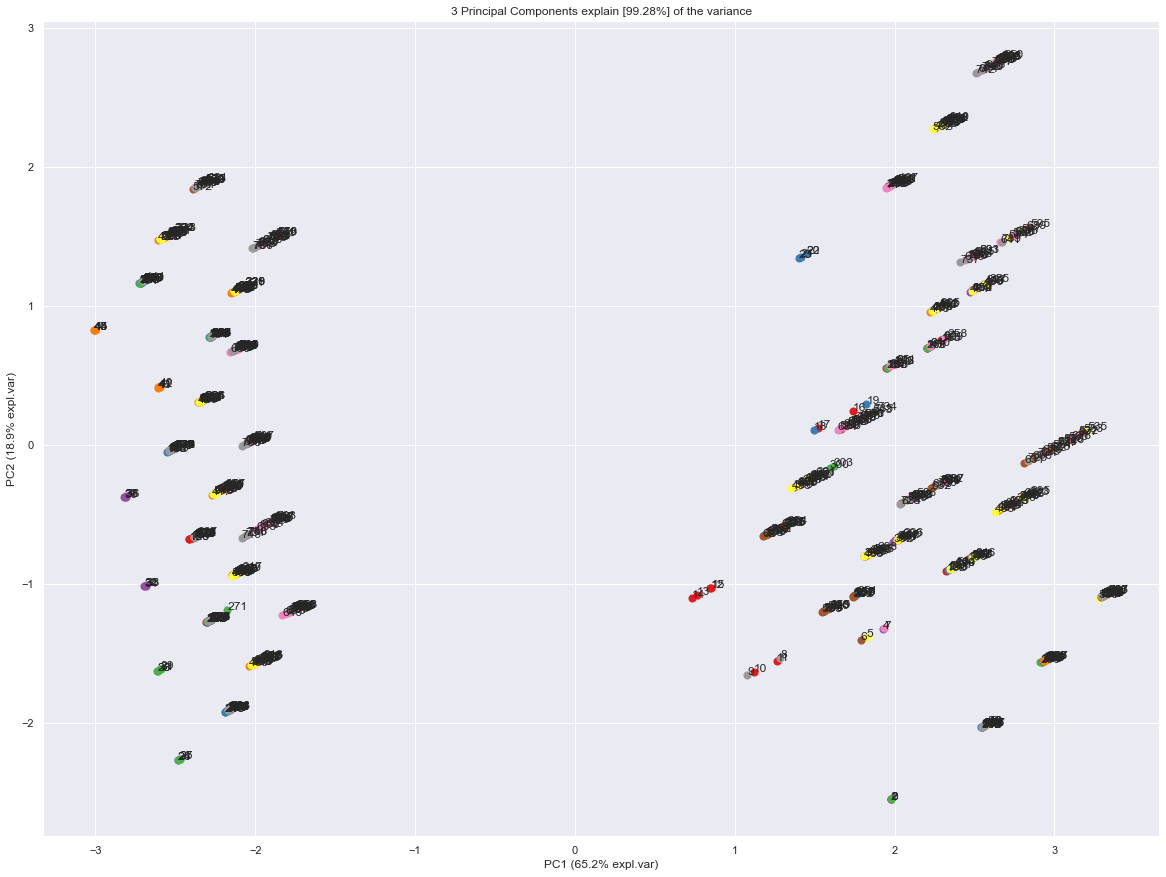

In [ ]:
model.scatter(label=True, legend=False)

Eigenvectors

In [ ]:
A = out['loadings'].T

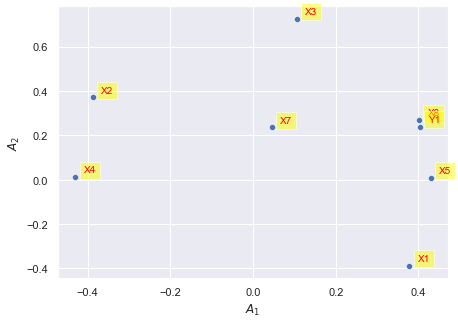

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

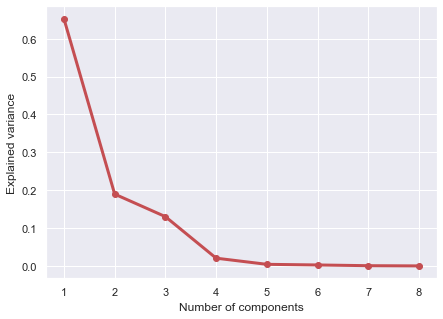

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

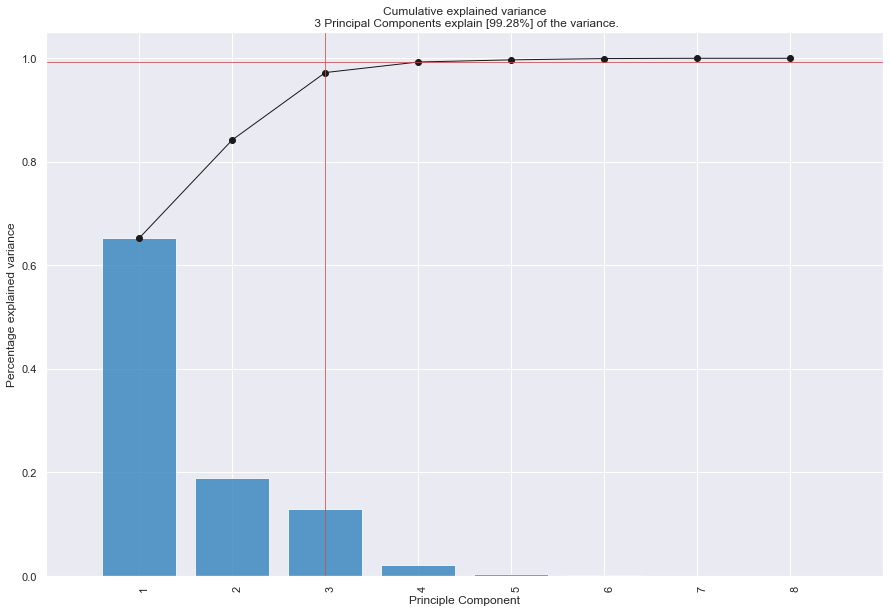

<Figure size 504x360 with 0 Axes>

In [ ]:
model.plot();